C:\Users\welcome\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\welcome\AppData\Local\Temp\ipykernel_5776\3890617787.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)



📌 Logistic Regression
Train Accuracy: 0.8707
Test Accuracy: 0.8293
Cross-Validation Accuracy: 0.8604
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82       102
           1       0.79      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205


📌 Decision Tree
Train Accuracy: 0.9146
Test Accuracy: 0.8439
Cross-Validation Accuracy: 0.8848
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       102
           1       0.79      0.93      0.86       103

    accuracy                           0.84       205
   macro avg       0.86      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205


📌 Random Forest
Train Accuracy: 0.9293
Test Accuracy: 0.8537
Cross-Validation Accuracy: 0.9004
Clas

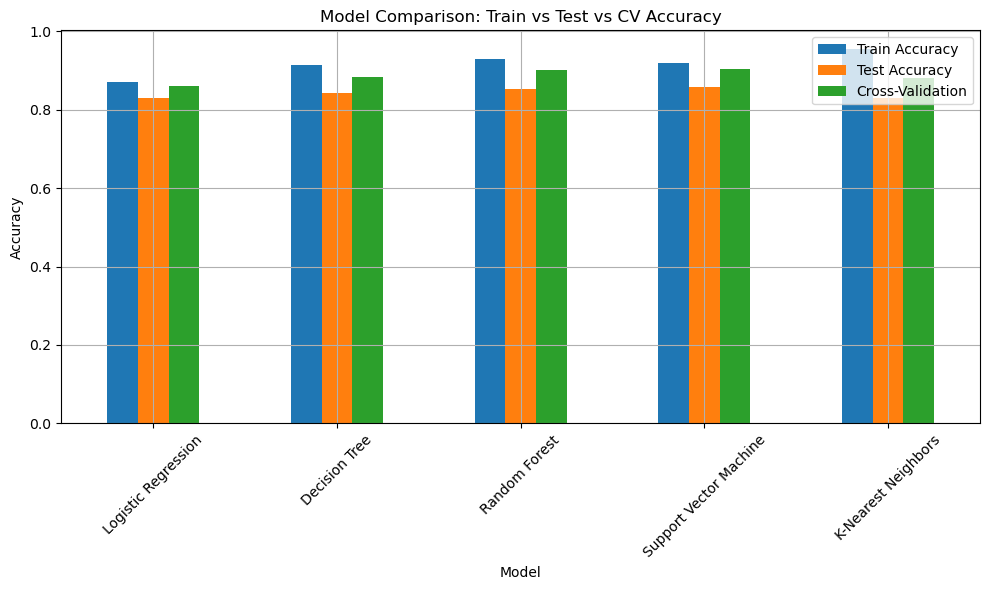


Summary of Model Comparison:
                        Train Accuracy  Test Accuracy  Cross-Validation
Model                                                                  
Support Vector Machine        0.919512       0.858537          0.904340
Random Forest                 0.929268       0.853659          0.900447
Decision Tree                 0.914634       0.843902          0.884818
K-Nearest Neighbors           0.954878       0.829268          0.880973
Logistic Regression           0.870732       0.829268          0.860442


In [1]:

# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 📥 Load Data
df = pd.read_csv('HeartDiseaseTrain-Test.csv')

# 🧹 Clean Categorical Strings
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 🧠 One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# 📊 Feature / Target Split
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# 🧪 Feature Selection (Optional: Keep Top 10)
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_columns = selector.get_feature_names_out()

# 🧪 Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# 🔀 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🤖 Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# 📈 Model Evaluation
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    cv_acc = cross_val_score(model, X_scaled, y, cv=10).mean()
    
    print(f"\n📌 {name}")
    print("Train Accuracy:", round(train_acc, 4))
    print("Test Accuracy:", round(test_acc, 4))
    print("Cross-Validation Accuracy:", round(cv_acc, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Cross-Validation": cv_acc
    })

# 📊 Compare Models
results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)
results_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison: Train vs Test vs CV Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 📋 Summary
print("\nSummary of Model Comparison:")
print(results_df.sort_values("Cross-Validation", ascending=False))
